<a href="https://colab.research.google.com/github/wurifah/Bisaai/blob/main/regresi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regresi Harga Rumah

Dibawah ini adalah proses regresi dari data harga penjualan rumah. Regresi dilakukan terhadap suatu dataset. Setelah proses regresi akan dilakukan prediksi berdasarkan model regresi yang telah dilakukan

In [1]:
# Import library yang dibutuhkan

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#pembacaan dataset

df = pd.read_csv('kc_house_data.csv')
df.head(10)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [3]:
df.shape

(21613, 21)

In [4]:
# pada dataset nilai bathroom dan floors adalah float. Karena pada kenyataannya
# tidak ada jumlah mandi dan floors yang nilainya float, maka kita ganti menjadi data integer

df['bathrooms'] = df['bathrooms'].astype('int')
df['floors'] = df['floors'].astype('int')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  int64  
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  int64  
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [6]:
df.describe(include='all')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
unique,NaN,372,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,20140623T000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,142,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,4.580302e+09,NaN,5.400881e+05,3.370842,1.749734,2079.899736,1.510697e+04,1.446213,0.007542,0.234303,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,NaN,3.671272e+05,0.930062,0.734873,918.440897,4.142051e+04,0.551894,0.086517,0.766318,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,NaN,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,NaN,3.219500e+05,3.000000,1.000000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,NaN,4.500000e+05,3.000000,2.000000,1910.000000,7.618000e+03,1.000000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,NaN,6.450000e+05,4.000000,2.000000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000


In [7]:
df.dropna()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1,1180,5650,1,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2,2570,7242,2,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1,770,10000,1,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3,1960,5000,1,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2,1680,8080,1,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2,1530,1131,3,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2,2310,5813,2,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0,1020,1350,2,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2,1600,2388,2,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [8]:
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

Diatas adalah dataset mengenai harga penjualan rumah. Terdapat 21613 baris atau penjualan dan 21 kolom. 21 kolom tersebut adalah:
1. id : kode penjualan rumah
2. date : tanggal saat rumah terjual
3. price: harga rumah
4. bedrooms : jumlah kamar tidur
5. bathrooms : jumlah kamar mandi
6. sqft_living : luas persegi bangunan rumah dalam satuan foot atau kaki
7. sqft_lot : luas persegi ukuran lot
8. floors: jumlah lantai rumah
9. waterfront : bagian ini menunjukkan apakah rumah memiliki pemandangan ke laut atau tidak. 1 untuk ya dan 0 untuk tidak
10. view : bagian ini menunjukkan apakah rumah sudah pernah dilihat atau belum. 1 untuk sudah dan 0 untuk belum
11. condition : bagian ini menunjukkan kondisi rumah dengan skala 1 sampai 5
12. grade : bagian ini menunjukkan nilai keseluruhan yang diberikan kepada unit perumahan, berdasarkan sistem penilaian King County dalam skala 1 hingga 11
13. sqft_above : bagian ini menunjukkan luas persegi rumah selain ruang bawah tanah.
14. sqft_basement : bagian ini menunjukkan luas persegi ruang bawah tanah rumah.
15. yr_built : tahun pembangunan rumah
16. yr_renovated : tahun renovasi rumah
17. zipcode : kode pos lokasi rumah
18. lat : bagian ini menunjukkan garis lintang lokasi rumah
19. long : bagian ini menunjukkan garis bujur lokasi rumah
20. sqft_living15 : luas bangunan rumah pada tahun 2015 dengan beberapa renovasi
21. sqft_lot15 : luas persegi ukuran lot tahun 2015

Disini kita tidak akan memasukkan data id, date ,lat, long dan zipcode. Kita juga hapus kolom view karena pada dataset nilai view tidak hanya 1 atau 0. Regresi dilakukan dengan price sebagai variabel dependen dan semua variabel selain yang sudah disebutkan merupakan variabel independen.

In [9]:
df.drop(columns = 'id', inplace = True)
df.drop(columns = 'date', inplace = True)
df.drop(columns = 'zipcode', inplace = True)
df.drop(columns = 'view', inplace = True)
df.drop(columns = 'lat', inplace = True)
df.drop(columns = 'long', inplace = True)

In [10]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,sqft_living15,sqft_lot15
0,221900.0,3,1,1180,5650,1,0,3,7,1180,0,1955,0,1340,5650
1,538000.0,3,2,2570,7242,2,0,3,7,2170,400,1951,1991,1690,7639
2,180000.0,2,1,770,10000,1,0,3,6,770,0,1933,0,2720,8062
3,604000.0,4,3,1960,5000,1,0,5,7,1050,910,1965,0,1360,5000
4,510000.0,3,2,1680,8080,1,0,3,8,1680,0,1987,0,1800,7503


Selanjutnya kita melihat jumlah data tiap kolom untuk mencari nilai outlier. Jika terdapat nilai outlier, maka kita hapus baris tersebut

In [11]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [12]:
# pada data bedrooms terdapat outlier yaitu jumlah 33. Maka kita hapus baris tersebut
df=df[df['bedrooms']!=33]

In [13]:
bedrooms_count = df['bedrooms'].value_counts()
bedrooms_count

3     9824
4     6882
2     2760
5     1601
6      272
1      199
7       38
0       13
8       13
9        6
10       3
11       1
Name: bedrooms, dtype: int64

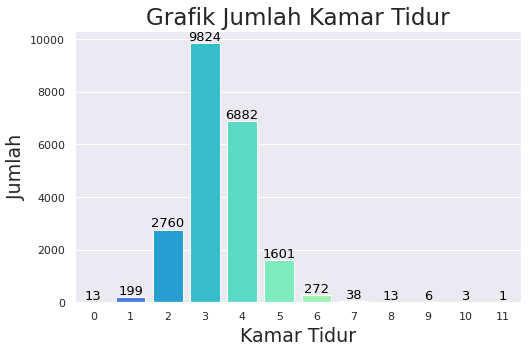

In [14]:
sns.set()
plt.figure(figsize=(8,5))
ax = sns.countplot(x="bedrooms", data=df,palette="rainbow")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=13)
plt.title('Grafik Jumlah Kamar Tidur',fontsize=23)
plt.ylabel('Jumlah',fontsize=19)
plt.xlabel('Kamar Tidur',fontsize=19)
plt.savefig('bedrooms.png')
plt.show()

In [15]:
bathrooms_count = df['bathrooms'].value_counts()
bathrooms_count

2    10542
1     8354
3     2228
4      338
0       86
5       48
6       12
8        2
7        2
Name: bathrooms, dtype: int64

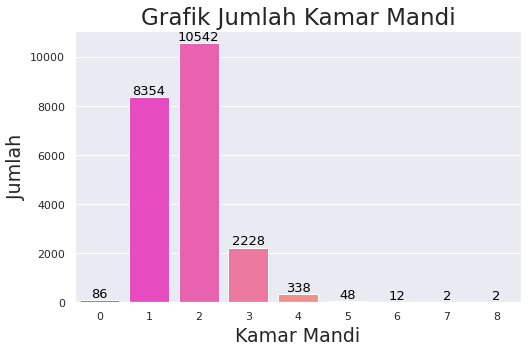

In [16]:
sns.set()
plt.figure(figsize=(8,5))
ax = sns.countplot(x="bathrooms", data=df,palette="spring")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=13)
plt.title('Grafik Jumlah Kamar Mandi',fontsize=23)
plt.ylabel('Jumlah',fontsize=19)
plt.xlabel('Kamar Mandi',fontsize=19)
plt.savefig('bathrooms.png')
plt.show()

In [17]:
floors_count = df['floors'].value_counts()
print(floors_count)

1    12589
2     8402
3      621
Name: floors, dtype: int64


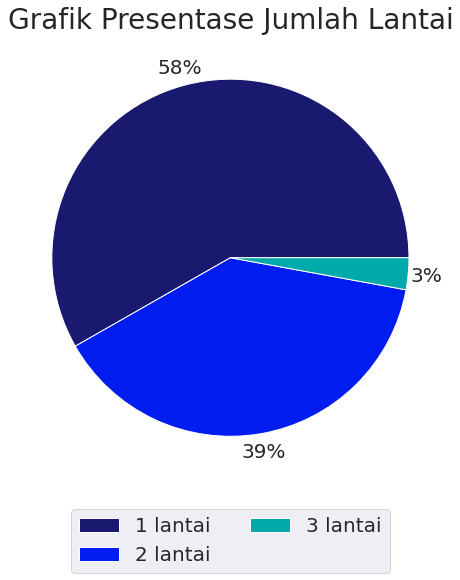

In [18]:
plt.figure(figsize=(8,9))
plt.pie(floors_count, colors=['#191970', '#001CF0', '#00AAAA'], autopct='%1.0f%%',pctdistance=1.1,labeldistance=1.4, textprops= {'fontsize':20})
plt.title('Grafik Presentase Jumlah Lantai',fontsize=28)
plt.legend(labels=['1 lantai','2 lantai','3 lantai'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.savefig('LANTAI.png')
plt.show()

In [19]:
waterfront_count = df['waterfront'].value_counts()
print(waterfront_count)

0    21449
1      163
Name: waterfront, dtype: int64


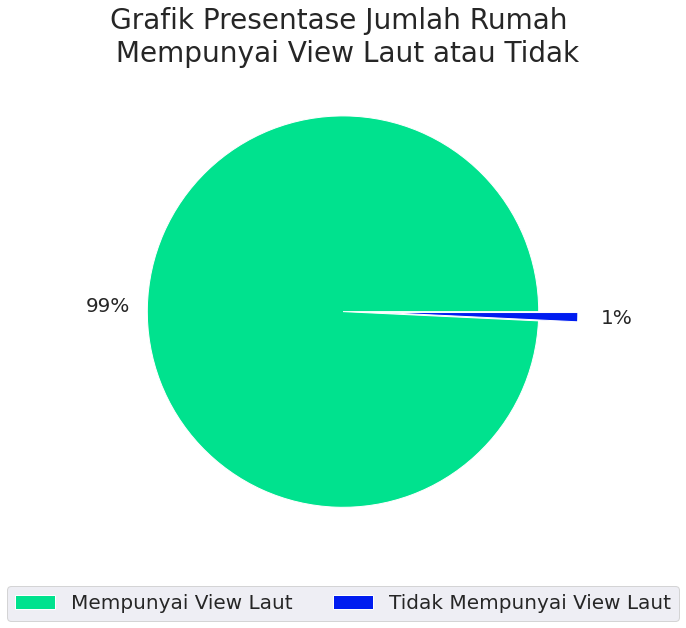

In [20]:
plt.figure(figsize=(10,9))
explode=(0.0 , 0.2)
plt.pie(waterfront_count, colors=['#00E28E','#001CF0'], autopct='%1.0f%%',pctdistance=1.2,labeldistance=1.4, textprops= {'fontsize':20},explode=explode)
plt.title('Grafik Presentase Jumlah Rumah \n Mempunyai View Laut atau Tidak',fontsize=28)
plt.legend(labels=['Mempunyai View Laut','Tidak Mempunyai View Laut'],fontsize=20,loc='upper center', bbox_to_anchor=(0.5, -0.04), ncol=2)
plt.savefig('view.png')
plt.show()

In [21]:
condition_count = df['condition'].value_counts()
print(condition_count)

3    14031
4     5679
5     1700
2      172
1       30
Name: condition, dtype: int64


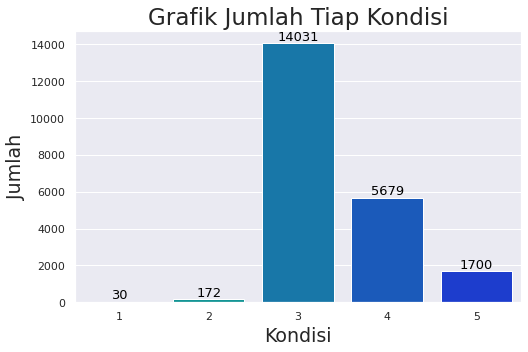

In [22]:
sns.set()
plt.figure(figsize=(8,5))
ax = sns.countplot(x="condition", data=df,palette="winter_r")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=13)
plt.title('Grafik Jumlah Tiap Kondisi',fontsize=23)
plt.ylabel('Jumlah',fontsize=19)
plt.xlabel('Kondisi',fontsize=19)
plt.savefig('condition.png')
plt.show()

In [23]:
grade_count = df['grade'].value_counts()
print(grade_count)

7     8980
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: grade, dtype: int64


In [24]:
# karena pada penjelasan dataset nilai grade hanya berkisar antara 1 sampai 11, maka kita hapus baris dengan nilai grade 12 dan 13
df=df[df['grade']!=13]
df=df[df['grade']!=12]

In [25]:
grade_count = df['grade'].value_counts()
print(grade_count)

7     8980
8     6068
9     2615
6     2038
10    1134
11     399
5      242
4       29
3        3
1        1
Name: grade, dtype: int64


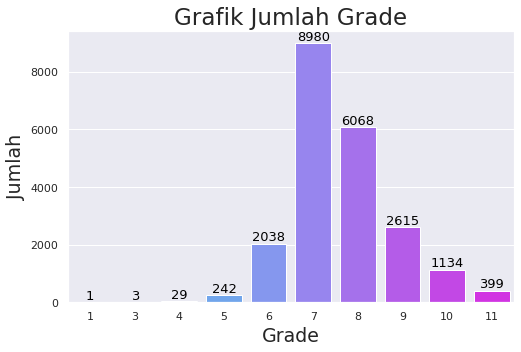

In [26]:
sns.set()
plt.figure(figsize=(8,5))
ax = sns.countplot(x="grade", data=df,palette="cool")
for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', va='bottom', color='black', size=13)
plt.title('Grafik Jumlah Grade',fontsize=23)
plt.ylabel('Jumlah',fontsize=19)
plt.xlabel('Grade',fontsize=19)
plt.savefig('grades.png')
plt.show()

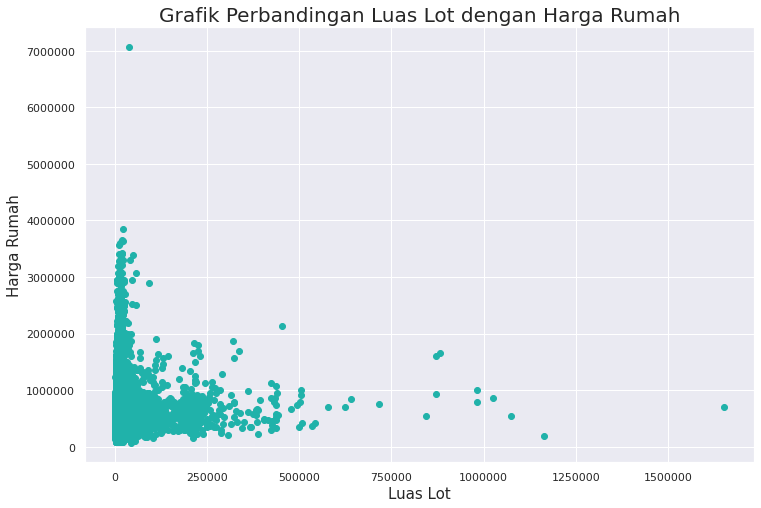

In [27]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_lot , df.price, color = 'lightseagreen')
plt.title('Grafik Perbandingan Luas Lot dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas Lot',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

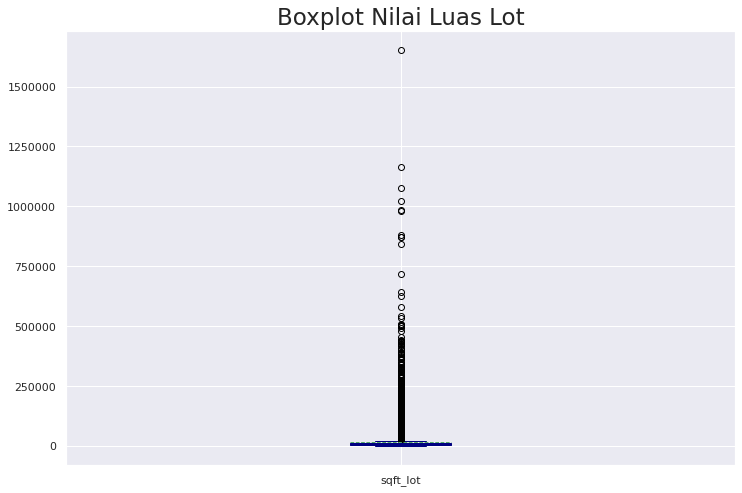

In [43]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['sqft_lot'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Lot', fontsize=23)
plt.show()

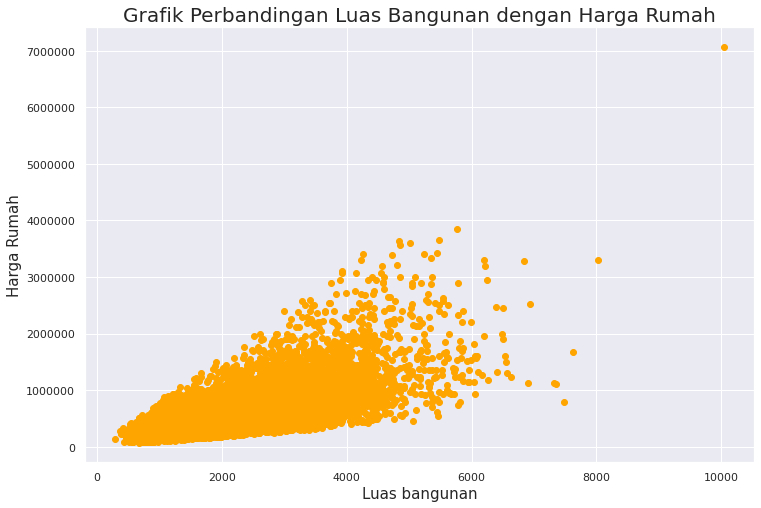

In [28]:
sns.set()
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_living , df.price, color = 'orange')
plt.title('Grafik Perbandingan Luas Bangunan dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas bangunan',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

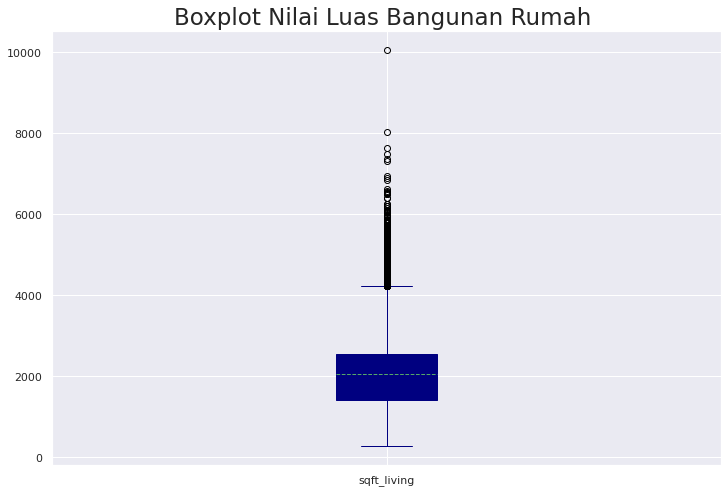

In [30]:
plt.figure(figsize=(12,8))
df.boxplot(grid='True',column =['sqft_living'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Bangunan Rumah ', fontsize=23)
plt.show()

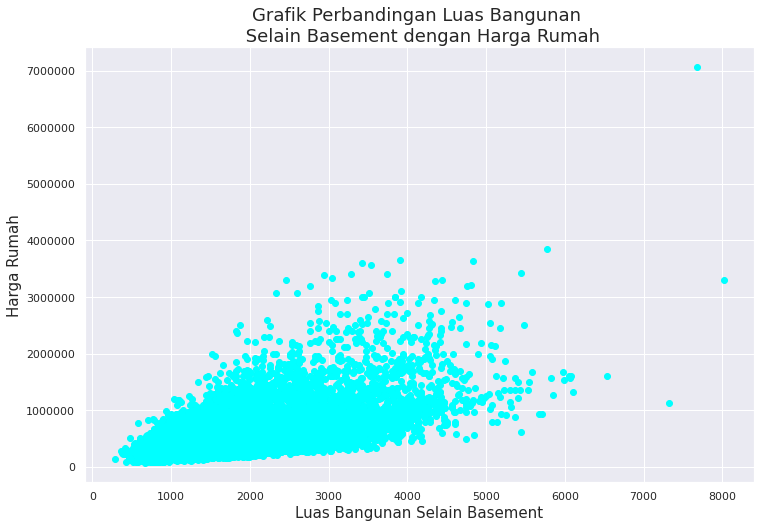

In [31]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_above , df.price, color = 'cyan')
plt.title('Grafik Perbandingan Luas Bangunan \n Selain Basement dengan Harga Rumah', size = 18)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas Bangunan Selain Basement',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

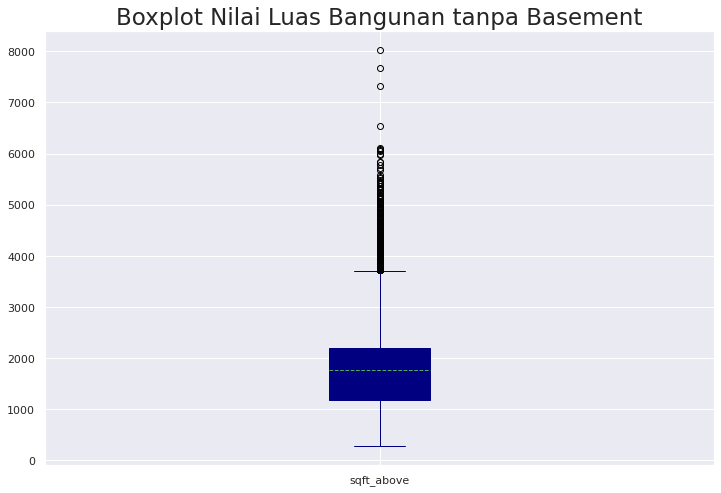

In [32]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['sqft_above'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Bangunan tanpa Basement', fontsize=23)
plt.show()

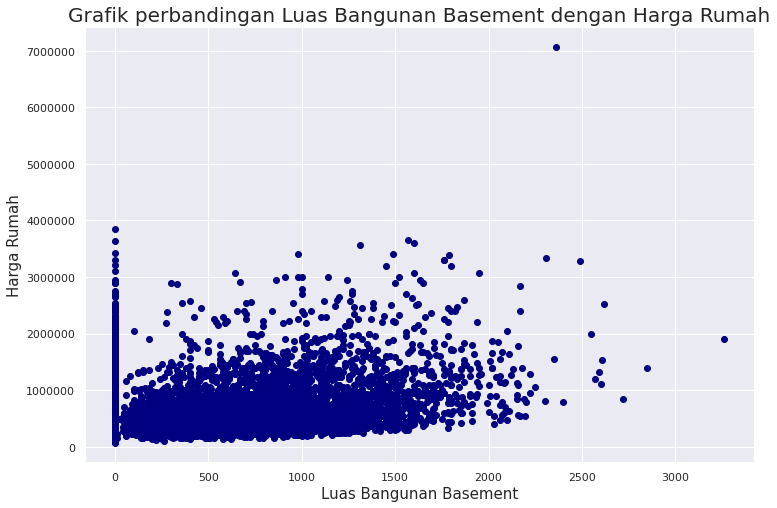

In [33]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_basement , df.price, color = 'navy')
plt.title('Grafik perbandingan Luas Bangunan Basement dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas Bangunan Basement',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

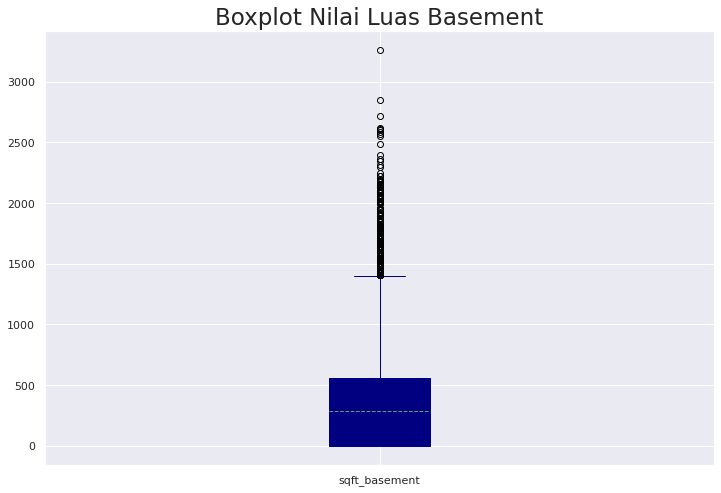

In [34]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['sqft_basement'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Basement', fontsize=23)
plt.show()


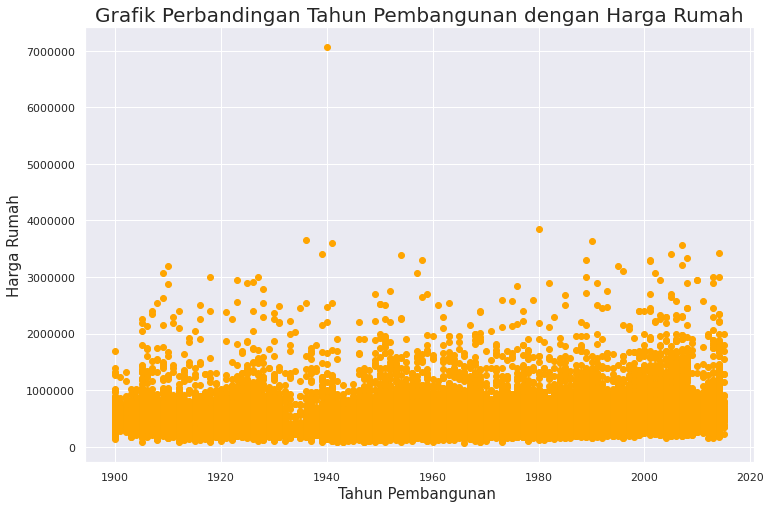

In [35]:
plt.figure(figsize=(12,8))
plt.scatter(df.yr_built , df.price, color = 'orange')
plt.title('Grafik Perbandingan Tahun Pembangunan dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Tahun Pembangunan ',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

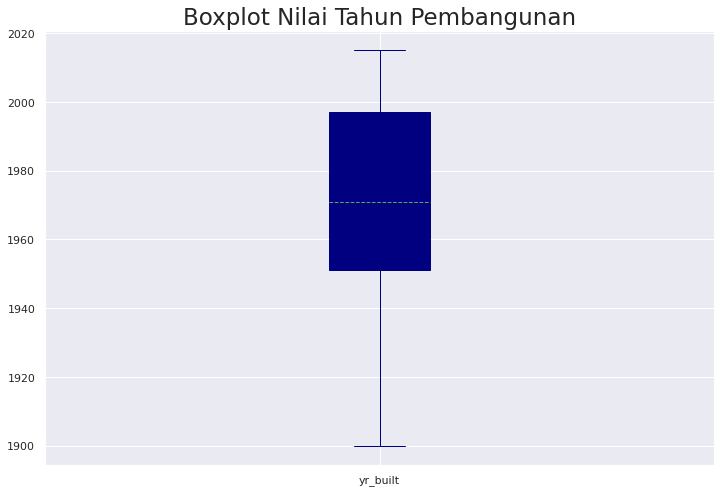

In [36]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['yr_built'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Tahun Pembangunan', fontsize=23)
plt.show()

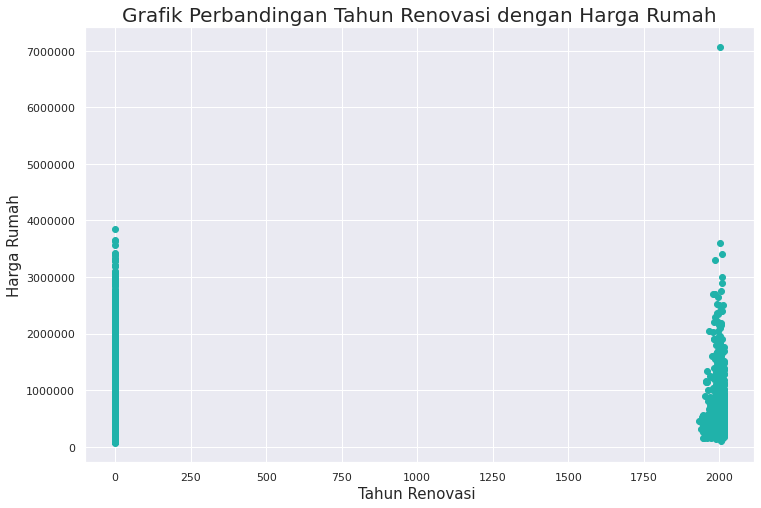

In [37]:
plt.figure(figsize=(12,8))
plt.scatter(df.yr_renovated , df.price, color = 'lightseagreen')
plt.title('Grafik Perbandingan Tahun Renovasi dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Tahun Renovasi ',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

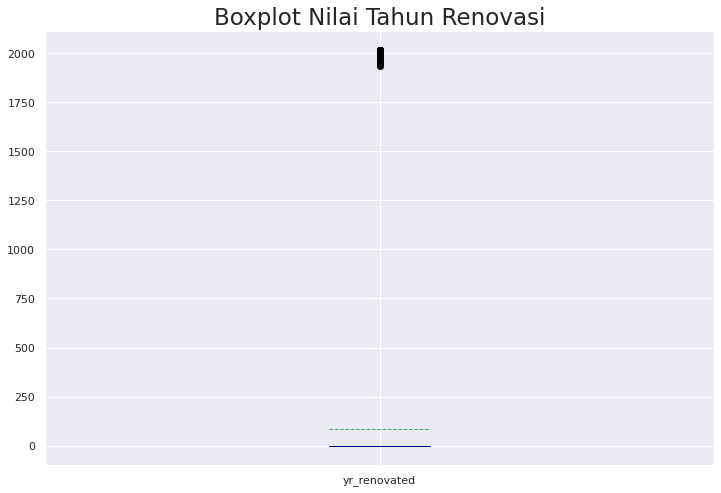

In [38]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['yr_renovated'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Tahun Renovasi', fontsize=23)
plt.show()

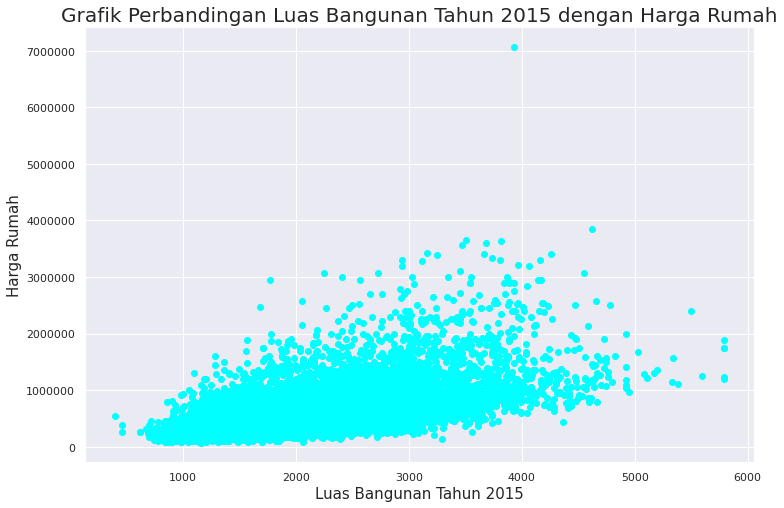

In [39]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_living15 , df.price, color = 'cyan')
plt.title('Grafik Perbandingan Luas Bangunan Tahun 2015 dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas Bangunan Tahun 2015',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

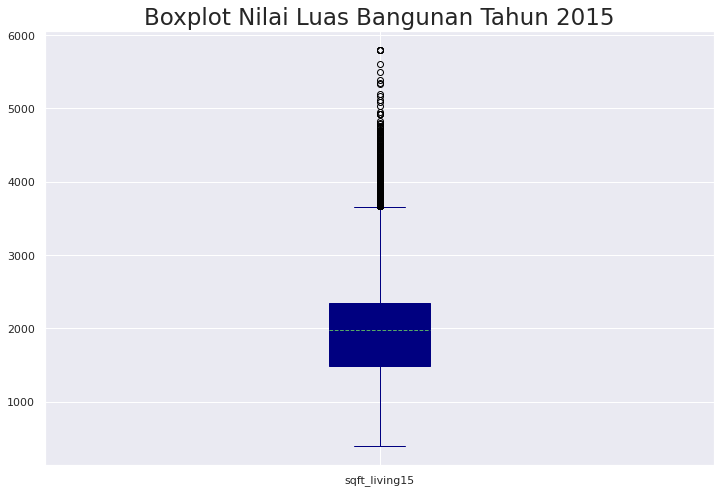

In [40]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['sqft_living15'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Bangunan Tahun 2015', fontsize=23)
plt.show()

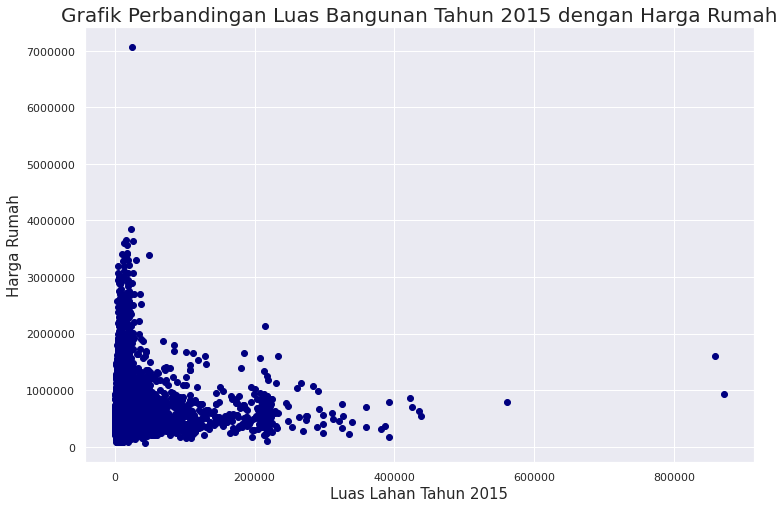

In [41]:
plt.figure(figsize=(12,8))
plt.scatter(df.sqft_lot15 , df.price, color = 'navy')
plt.title('Grafik Perbandingan Luas Bangunan Tahun 2015 dengan Harga Rumah', size = 20)
plt.ticklabel_format(style='plain')
plt.xlabel('Luas Lahan Tahun 2015',size = 15)
plt.ylabel('Harga Rumah',size = 15)
plt.show()

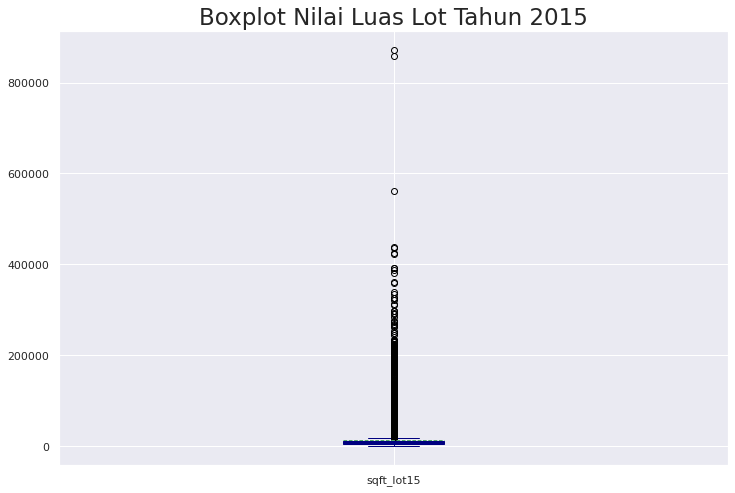

In [42]:
plt.figure(figsize=(12,8))
plt.ticklabel_format(style='plain')
df.boxplot(grid='True',column =['sqft_lot15'], color='navy', patch_artist=True, meanline=True, showmeans=True)
plt.title('Boxplot Nilai Luas Lot Tahun 2015', fontsize=23)
plt.show()

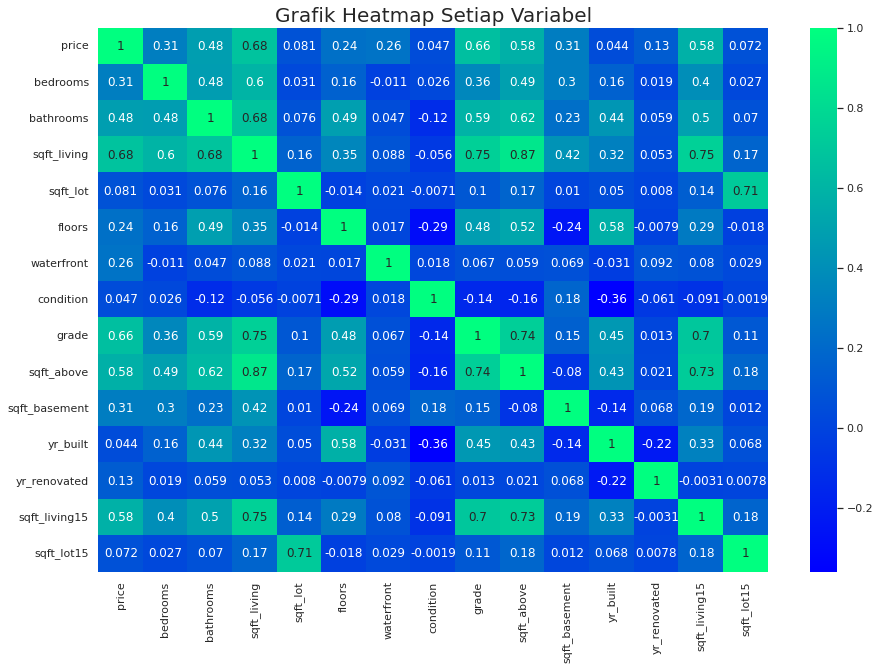

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, cmap='winter')
plt.title('Grafik Heatmap Setiap Variabel',fontsize=20)
plt.savefig('heatmap.png')
plt.show()

Berdasarkan grafik heatmap, variabel yang mempunyai pengaruh besar terhadap 
pertambahan harga rumah adalah variabel sqft_living, grade, sqft_above dan sqft_living15 yaitu mencapai lebih dari 0,5.


## Preprocessing

Data akan dibagi kedalam data training dan data testing dengan 30% data testing dan 70% data training

In [45]:
from sklearn.model_selection import train_test_split

# membuat variabel x dan y
x = df.drop(columns='price')
y = df['price']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.30, random_state = 15)

print(f"Jumlah data training: {x_train.shape[0]}")
print(f"Jumlah data testing: {x_test.shape[0]}")

Jumlah data training: 15056
Jumlah data testing: 6453


## Data modelling

Proses regresi akan dilakukan dengan menggunakan beberapa model yaitu *Regresi Linear, Decision Tree, Random Forest dan Deep Neural Network*. Setelah melakukan proses modelling, akan dilakukan proses evaluasi performa meliputi nilai *Mean Squared Error (MSE), Mean Absolute Percentage Error (MAPE), R Squared Score (R^2) dan Mean Absolute Error*

1. Mean Squared Error (MSE)

*   MSE adalah pengukuran rata-rata kuadrat kesalahan atau selisih kuadrat rata-rata antara nilai prediksi dan nilai sebenarnya.

   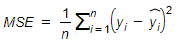
  
   Nilai MSE ini dapat diakarkan menjadi nilai Root Mean Squared Error atau RMSE

2. Mean Absolute Percentage Error (MAPE)


*   MAPE adalah pengukuran akurasi dalam bentuk persentase yang dapat dihitung sebagai kesalahan persen absolut rata-rata untuk setiap periode waktu dikurangi nilai aktual, dibagi dengan nilai aktual.

  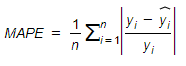

3. R Squared Score (R^2)


*   R^2 menjelaskan sejauh mana varians variabel A menjelaskan varians variabel B. Jadi jika R^2 bernilai 0,5 maka setengah varians variabel A dapat dijelaskan oleh varians variabel B

  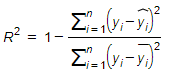

4. Mean Absolute Error (MAE)


*   MAE adalah perhitungan rata-rata dari kesalahan absolut

  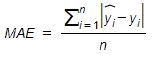





### Regresi Linear

In [46]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

In [47]:
lr_score = lr.score(x_test, y_test)
print('Model Accuracy Regresi Linear : ' , lr_score)

Model Accuracy Regresi Linear :  0.6189077508384442


In [48]:
lr_pred = lr.predict(x_test)

In [49]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_percentage_error

lr_mse = mean_squared_error(y_test.values, lr_pred)
lr_rmse = mean_squared_error(y_test.values, lr_pred,squared=False)
lr_mape = mean_absolute_percentage_error(y_test.values, lr_pred)
lr_mae = mean_absolute_error(y_test.values, lr_pred)
lr_r = r2_score(y_test.values, lr_pred)

print('Nilai Mean Squared Error             = {}'.format(lr_mse))
print('Nilai Root Mean Squared Error        = {}'.format(lr_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(lr_mape))
print('Nilai Mean Absolute Error            = {}'.format(lr_mae))
print('Nilai R2                             = {}'.format(lr_r))

Nilai Mean Squared Error             = 39827503256.16087
Nilai Root Mean Squared Error        = 199568.29221136527
Nilai Mean Absolute Percentage Error = 0.28836491113728796
Nilai Mean Absolute Error            = 134963.85033123475
Nilai R2                             = 0.6189077508384442


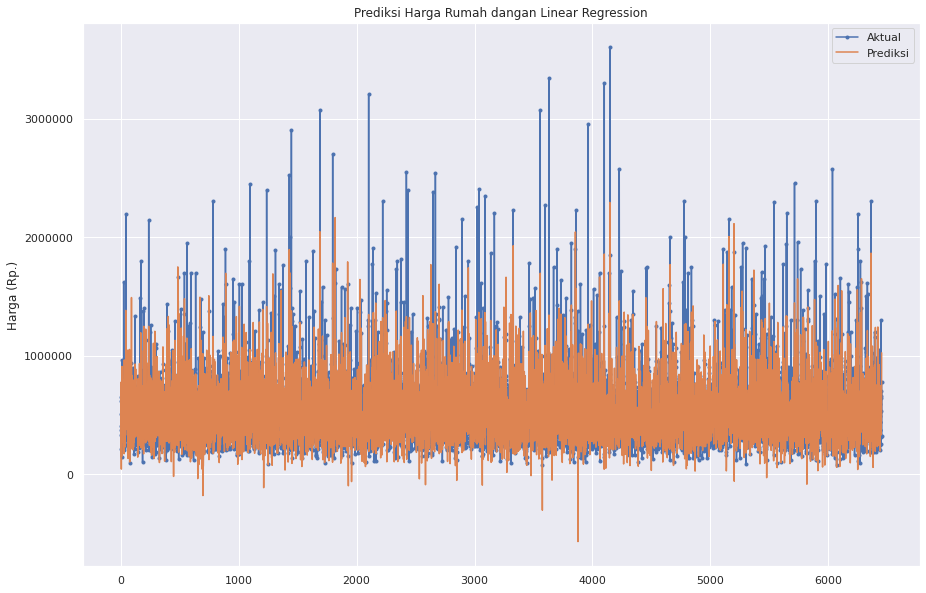

In [50]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), lr_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Linear Regression')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

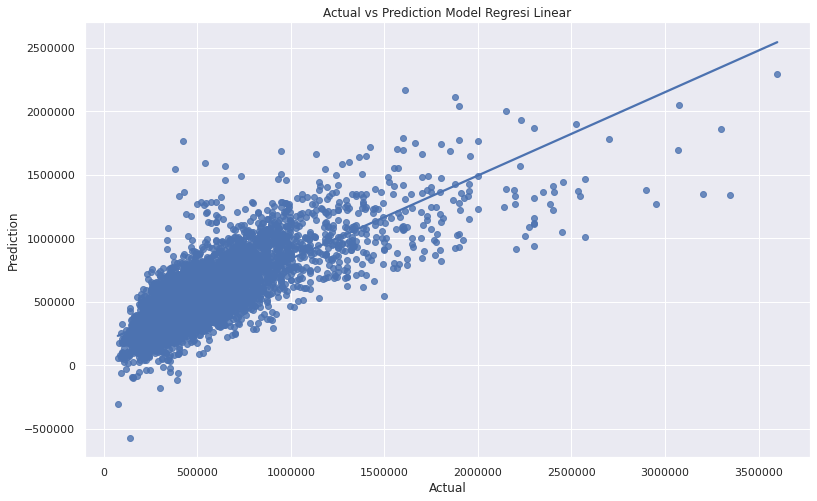

In [59]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=lr_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Regresi Linear')
plt.ticklabel_format(style='plain')
plt.show()

In [52]:
hasil_prediksi = pd.DataFrame()
hasil_prediksi['Aktual'] = y_test.values.flatten()
hasil_prediksi['Linear Regression'] = lr_pred.flatten()
hasil_prediksi['Linear Regression'] = hasil_prediksi['Linear Regression'].round(0)
hasil_prediksi.head(5)

,Aktual,Linear Regression
0,405000.0,451414.0
1,612995.0,636538.0
2,334009.0,287319.0
3,508000.0,776378.0
4,652427.0,669469.0


# Decision Tree

In [53]:
from sklearn.tree import DecisionTreeRegressor
dt = DecisionTreeRegressor()
dt.fit(x_train, y_train)

DecisionTreeRegressor()

In [54]:
dt_score = dt.score(x_test, y_test)
print('Model accuracy Decision Tree : ' , dt_score)

Model accuracy Decision Tree :  0.46385512861900924


In [55]:
dt_pred = dt.predict(x_test)

In [56]:
dt_mse = mean_squared_error(y_test.values, dt_pred)
dt_rmse = mean_squared_error(y_test.values, dt_pred,squared=False)
dt_mape = mean_absolute_percentage_error(y_test.values, dt_pred)
dt_mae = mean_absolute_error(y_test.values, dt_pred)
dt_r = r2_score(y_test.values, dt_pred)

print('Nilai Mean Squared Error      = {}'.format(dt_mse))
print('Nilai Root Mean Squared Error = {}'.format(dt_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(dt_mape))
print('Nilai Mean Absolute Error     = {}'.format(dt_mae))
print('Nilai R2                      = {}'.format(dt_r))

Nilai Mean Squared Error      = 56031870649.901596
Nilai Root Mean Squared Error = 236710.52078414595
Nilai Mean Absolute Percentage Error = 0.31178997698243294
Nilai Mean Absolute Error     = 152825.8688981869
Nilai R2                      = 0.46385512861900924


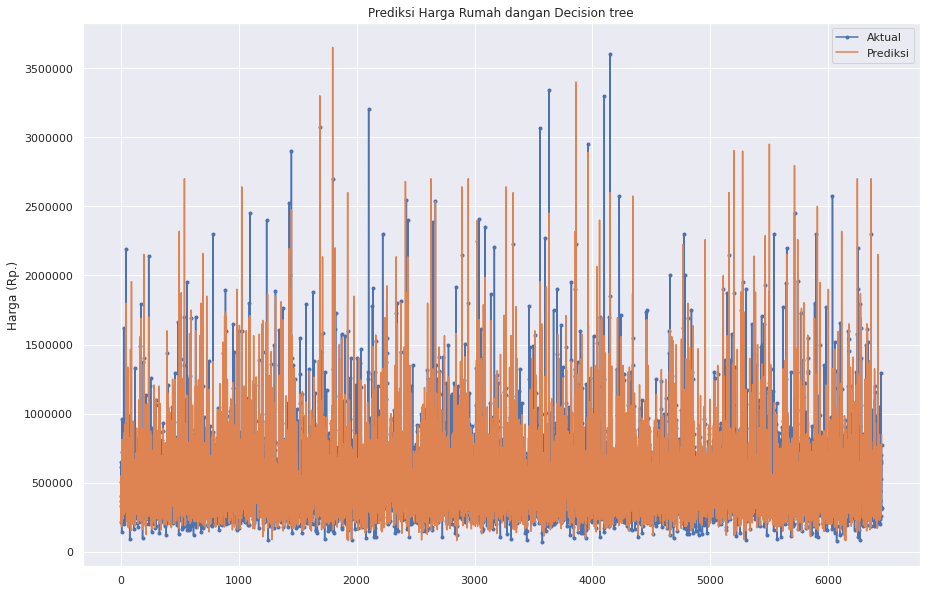

In [57]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), dt_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Decision tree')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

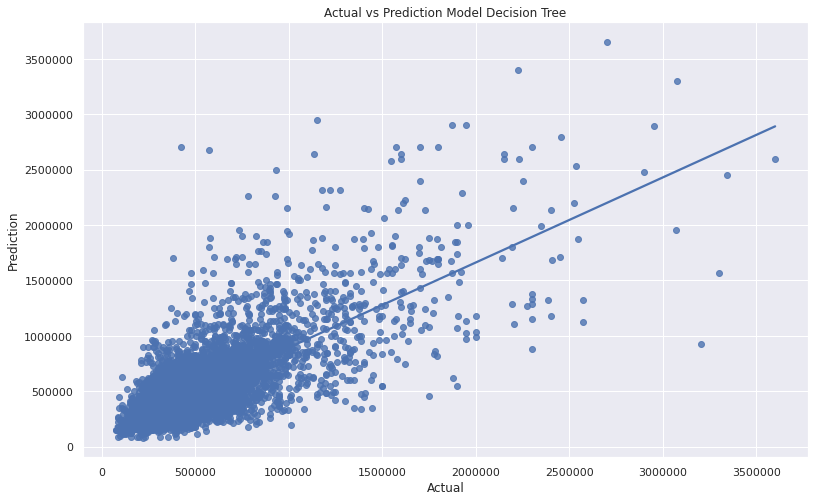

In [60]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=dt_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Decision Tree')
plt.ticklabel_format(style='plain')
plt.show()

In [61]:
hasil_prediksi['Decisiontree'] = dt_pred.flatten()
hasil_prediksi['Decisiontree'] = hasil_prediksi['Decisiontree'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,Decisiontree
0,405000.0,451414.0,400000.0
1,612995.0,636538.0,549995.0
2,334009.0,287319.0,525000.0
3,508000.0,776378.0,471000.0


# Random Forest

In [62]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=10, random_state=0)
rf.fit(x_train,y_train)

RandomForestRegressor(max_depth=10, random_state=0)

In [63]:
rf_score = rf.score(x_test, y_test)
print('Model Accuracy Random Forest : ' , rf_score)

Model Accuracy Random Forest :  0.7169136191019375


In [64]:
rf_pred = rf.predict(x_test)

In [65]:
rf_mse = mean_squared_error(y_test.values, rf_pred)
rf_rmse = mean_squared_error(y_test.values, rf_pred,squared=False)
rf_mape = mean_absolute_percentage_error(y_test.values, rf_pred)
rf_mae = mean_absolute_error(y_test.values, rf_pred)
rf_r = r2_score(y_test.values, rf_pred)

print('Nilai Mean Squared Error      = {}'.format(rf_mse))
print('Nilai Root Mean Squared Error = {}'.format(rf_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(rf_mape))
print('Nilai Mean Absolute Error     = {}'.format(rf_mae))
print('Nilai R2                      = {}'.format(rf_r))

Nilai Mean Squared Error      = 29585025100.34716
Nilai Root Mean Squared Error = 172002.97991705599
Nilai Mean Absolute Percentage Error = 0.24715415455090656
Nilai Mean Absolute Error     = 115541.15812789928
Nilai R2                      = 0.7169136191019375


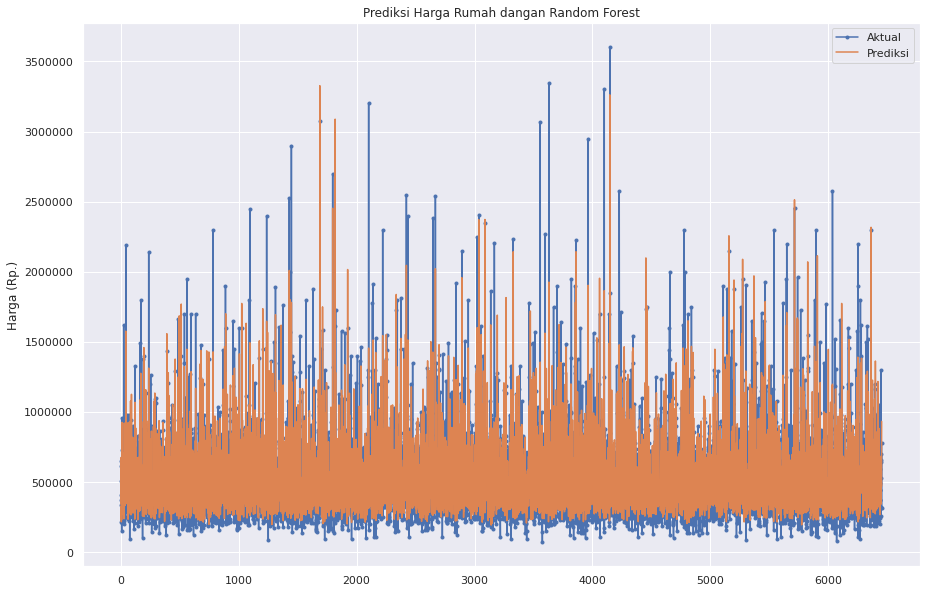

In [66]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), rf_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Random Forest')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

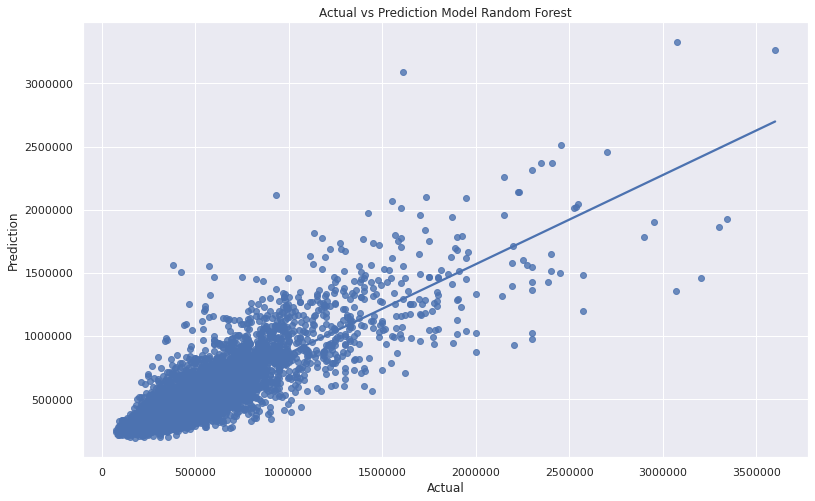

In [67]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=rf_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Random Forest')
plt.ticklabel_format(style='plain')
plt.show()

In [68]:
hasil_prediksi['Randomforest'] = rf_pred.flatten()
hasil_prediksi['Randomforest'] = hasil_prediksi['Randomforest'].round(0)
hasil_prediksi.head(4)

,Aktual,Linear Regression,Decisiontree,Randomforest
0,405000.0,451414.0,400000.0,413700.0
1,612995.0,636538.0,549995.0,554593.0
2,334009.0,287319.0,525000.0,344367.0
3,508000.0,776378.0,471000.0,674973.0




## Deep Neural Network

In [69]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
model = Sequential()
model.add(Dense(25, input_dim=x.shape[1], activation='relu'))
model.add(Dense(10, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
monitor = EarlyStopping(monitor='val_loss', min_delta=1e-3, 
                        patience=5, verbose=1, mode='auto', 
                        restore_best_weights=True)
history = model.fit(x_train,y_train,validation_data=(x_test,y_test),
          callbacks=[monitor],verbose=2,epochs=500)

Epoch 1/500
471/471 - 2s - loss: 324298047488.0000 - val_loss: 270632108032.0000 - 2s/epoch - 4ms/step
Epoch 2/500
471/471 - 1s - loss: 200878440448.0000 - val_loss: 127230328832.0000 - 834ms/epoch - 2ms/step
Epoch 3/500
471/471 - 1s - loss: 89705332736.0000 - val_loss: 63003340800.0000 - 826ms/epoch - 2ms/step
Epoch 4/500
471/471 - 1s - loss: 66964668416.0000 - val_loss: 58585772032.0000 - 783ms/epoch - 2ms/step
Epoch 5/500
471/471 - 1s - loss: 64742051840.0000 - val_loss: 57349689344.0000 - 898ms/epoch - 2ms/step
Epoch 6/500
471/471 - 1s - loss: 63683940352.0000 - val_loss: 56462348288.0000 - 895ms/epoch - 2ms/step
Epoch 7/500
471/471 - 1s - loss: 62721290240.0000 - val_loss: 55842291712.0000 - 788ms/epoch - 2ms/step
Epoch 8/500
471/471 - 1s - loss: 61945565184.0000 - val_loss: 55000711168.0000 - 921ms/epoch - 2ms/step
Epoch 9/500
471/471 - 1s - loss: 61192261632.0000 - val_loss: 54598787072.0000 - 782ms/epoch - 2ms/step
Epoch 10/500
471/471 - 1s - loss: 60622241792.0000 - val_loss: 

In [71]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                375       
                                                                 
 dense_1 (Dense)             (None, 10)                260       
                                                                 
 dense_2 (Dense)             (None, 1)                 11        
                                                                 
Total params: 646
Trainable params: 646
Non-trainable params: 0
_________________________________________________________________


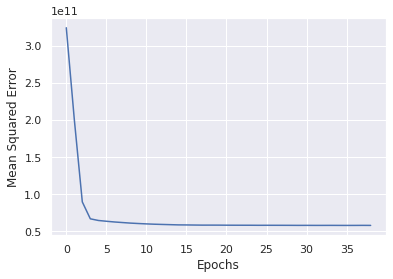

In [72]:
plt.plot(history.history['loss'])
plt.xlabel('Epochs')
plt.ylabel('Mean Squared Error')
plt.show()

In [73]:
dnn_pred = model.predict(x_test)

In [74]:
dnn_mse = mean_squared_error(y_test.values, dnn_pred)
dnn_rmse = mean_squared_error(y_test.values, dnn_pred,squared=False)
dnn_mape = mean_absolute_percentage_error(y_test.values, dnn_pred)
dnn_mae = mean_absolute_error(y_test.values, dnn_pred)
dnn_r = r2_score(y_test.values, dnn_pred)

print('Nilai Mean Squared Error      = {}'.format(dnn_mse))
print('Nilai Root Mean Squared Error = {}'.format(dnn_rmse))
print('Nilai Mean Absolute Percentage Error = {}'.format(dnn_mape))
print('Nilai Mean Absolute Error     = {}'.format(dnn_mae))
print('Nilai R2                      = {}'.format(dnn_r))

Nilai Mean Squared Error      = 52226150086.05844
Nilai Root Mean Squared Error = 228530.41391915092
Nilai Mean Absolute Percentage Error = 0.3331306524258513
Nilai Mean Absolute Error     = 157276.5903879494
Nilai R2                      = 0.5002704318838711


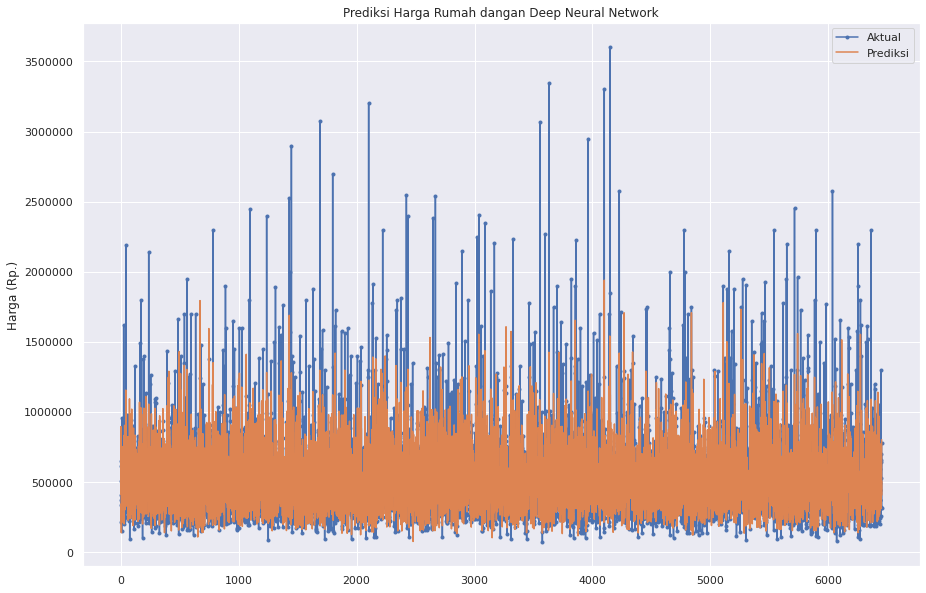

In [75]:
plt.figure(figsize=(15,10))
plt.plot(range(len(y_test)), y_test, marker='.', label="Aktual")
plt.plot(range(len(y_test)), dnn_pred.flatten(), label="Prediksi")
plt.ylabel('Harga (Rp.)')
plt.title('Prediksi Harga Rumah dangan Deep Neural Network')
plt.ticklabel_format(style='plain')
plt.legend()
plt.show()

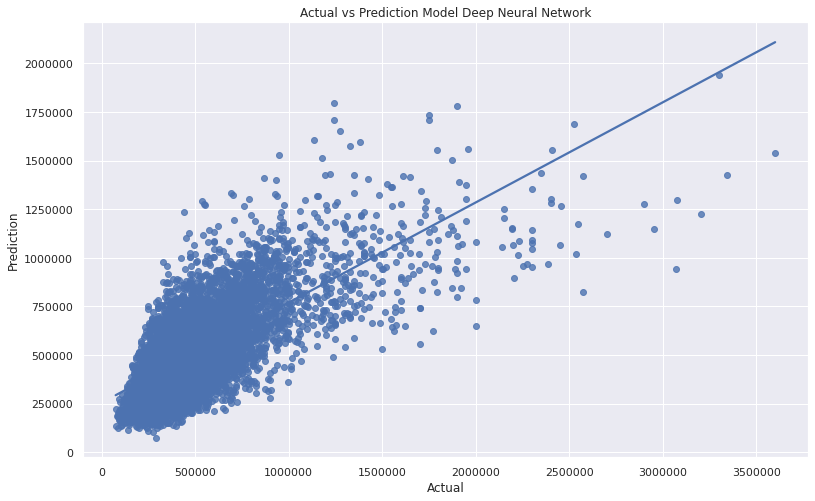

In [76]:
plt.figure(figsize = (13,8))
sns.regplot(x=y_test, y=dnn_pred, ci=None)
plt.xlabel('Actual')
plt.ylabel('Prediction')
plt.title('Actual vs Prediction Model Deep Neural Network')
plt.ticklabel_format(style='plain')
plt.show()

In [77]:
hasil_prediksi['DeepNeuralNetwork'] = dt_pred.flatten()
hasil_prediksi['DeepNeuralNetwork'] = hasil_prediksi['DeepNeuralNetwork'].round(0)
hasil_prediksi.head(10)

,Aktual,Linear Regression,Decisiontree,Randomforest,DeepNeuralNetwork
0,405000.0,451414.0,400000.0,413700.0,400000.0
1,612995.0,636538.0,549995.0,554593.0,549995.0
2,334009.0,287319.0,525000.0,344367.0,525000.0
3,508000.0,776378.0,471000.0,674973.0,471000.0
4,652427.0,669469.0,500000.0,565266.0,500000.0
5,213800.0,42297.0,208950.0,215904.0,208950.0
6,371500.0,413156.0,420000.0,328712.0,420000.0
7,206000.0,147900.0,184000.0,230105.0,184000.0
8,147000.0,248354.0,222000.0,267782.0,222000.0
9,650000.0,844048.0,765000.0,845514.0,765000.0


## Perbandingan nilai setiap model

In [78]:
print('Nilai MSE LinearRegression  = {}'.format(lr_mse))
print('Nilai MSE DecisionTree      = {}'.format(dt_mse))
print('Nilai MSE RandomForest      = {}'.format(rf_mse))
print('Nilai MSE DNN               = {}'.format(dnn_mse))
print('========================================================')
print('Nilai RMSE LinearRegression = {}'.format(lr_rmse))
print('Nilai RMSE DecisionTree     = {}'.format(dt_rmse))
print('Nilai RMSE RandomForest     = {}'.format(rf_rmse))
print('Nilai RMSE DNN              = {}'.format(dnn_rmse))
print('========================================================')
print('Nilai MAPE LinearRegression  = {}'.format(lr_mape))
print('Nilai MAPE DecisionTree      = {}'.format(dt_mape))
print('Nilai MAPE RandomForest      = {}'.format(rf_mape))
print('Nilai MAPE DNN               = {}'.format(dnn_mape))
print('========================================================')
print('Nilai MAE LinearRegression  = {}'.format(lr_mae))
print('Nilai MAE DecisionTree      = {}'.format(dt_mae))
print('Nilai MAE RandomForest      = {}'.format(rf_mae))
print('Nilai MAE DNN               = {}'.format(dnn_mae))
print('========================================================')
print('Nilai R2 Linear Regression  = {}'.format(lr_r))
print('Nilai R2 DecisionTree       = {}'.format(dt_r))
print('Nilai R2 RandomForest       = {}'.format(rf_r))
print('Nilai R2 DNN                = {}'.format(dnn_r))

Nilai MSE LinearRegression  = 39827503256.16087
Nilai MSE DecisionTree      = 56031870649.901596
Nilai MSE RandomForest      = 29585025100.34716
Nilai MSE DNN               = 52226150086.05844
Nilai RMSE LinearRegression = 199568.29221136527
Nilai RMSE DecisionTree     = 236710.52078414595
Nilai RMSE RandomForest     = 172002.97991705599
Nilai RMSE DNN              = 228530.41391915092
Nilai MAPE LinearRegression  = 0.28836491113728796
Nilai MAPE DecisionTree      = 0.31178997698243294
Nilai MAPE RandomForest      = 0.24715415455090656
Nilai MAPE DNN               = 0.3331306524258513
Nilai MAE LinearRegression  = 134963.85033123475
Nilai MAE DecisionTree      = 152825.8688981869
Nilai MAE RandomForest      = 115541.15812789928
Nilai MAE DNN               = 157276.5903879494
Nilai R2 Linear Regression  = 0.6189077508384442
Nilai R2 DecisionTree       = 0.46385512861900924
Nilai R2 RandomForest       = 0.7169136191019375
Nilai R2 DNN                = 0.5002704318838711


Dari data diatas, dapat dilihat model yang memberikan nilai terbaik adalah model Random Forest. Hal ini ditandai dengan nilai Mean Squared Error, Root Mean Squared Error, Mean Absolute Percentage Error dan Mean Absolute Error paling sedikit diantara model yang lain. Sedangkan nilai R Squared Error pada model Random Forest adalah yang terbesar sebanyak 0,7169136191019375 yang berarti 0,7169136191019375 varians variabel independen dapat dijelaskan oleh varians variabel dependen